1 - IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

2 - READ AND EXPLORE THE DATASET

In [15]:
news_data= pd.read_csv("news.csv")
news_data.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [16]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [17]:
news_data.shape

(6335, 4)

In [18]:
news_data["label"].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [20]:
labels= news_data.label
labels.head(5)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

3 - BUILD THE MODEL

In [21]:
#First, we split the dataset into train & test samples:
x_train, x_test, y_train, y_test= train_test_split(news_data["text"], labels, test_size= 0.4, random_state= 7)

vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=vectorizer.fit_transform(x_train) 
tfidf_test=vectorizer.transform(x_test)

#PassiveAggressiveClassifier
passive=PassiveAggressiveClassifier(max_iter=50)
passive.fit(tfidf_train,y_train)

y_pred=passive.predict(tfidf_test)

4 - EVALUATE THE MODEL'S ACCURACY

In [22]:
# confusion matrix
matrix= confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
matrix

array([[1182,   88],
       [  86, 1178]], dtype=int64)

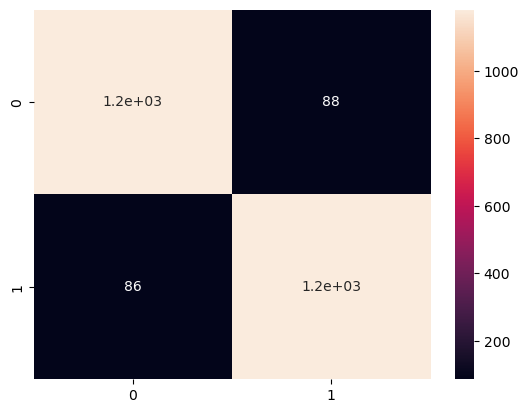

In [23]:
sns.heatmap(matrix, annot=True)
plt.show()

In [24]:
# model's accuracy
Accuracy=accuracy_score(y_test,y_pred)
Accuracy*100

93.1333859510655

In [25]:
Report= classification_report(y_test, y_pred)
print(Report)

              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93      1270
        REAL       0.93      0.93      0.93      1264

    accuracy                           0.93      2534
   macro avg       0.93      0.93      0.93      2534
weighted avg       0.93      0.93      0.93      2534

